## **Shubham Raj**

#### Importing Libraries

In [230]:
import pandas as pd                                         # importing pandas
import numpy as np                                          # impoting numpy
from sklearn.model_selection import train_test_split        # for splitting the data
from sklearn.feature_selection import VarianceThreshold     # for checking constant and quasi constant
from numpy import percentile                                # will be used in outlier

# for visualization
import matplotlib.pyplot as plt         
import seaborn as sns             

#Scaling
from sklearn.preprocessing import MinMaxScaler         # Min Max Scaling

#Feature Selection
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif
from sklearn.feature_selection import SelectKBest                                # filter method
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector                  # wrapper method

# For handling imbalance
from imblearn.over_sampling import SMOTE                # SMOTE
from imblearn.combine import SMOTETomek                 # SMOTETomek
from imblearn.combine import SMOTEENN                   # SMOTEENN
from imblearn.over_sampling import RandomOverSampler    # RandomOverSampler

# For distance based algorithm
from sklearn.linear_model import LogisticRegression     # Logistic regression
from sklearn.svm import SVC                             # SVC
from sklearn.neighbors import KNeighborsClassifier      # KNN Classifier

# For tree based algorithm
from sklearn.tree import DecisionTreeClassifier         # Decision tree Classifier
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from xgboost import XGBClassifier                       # XGB Classifier
import lightgbm as ltb                                  # LGBM

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Cross Validation 
from sklearn.model_selection import StratifiedKFold

# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV

import pickle

In [231]:
import warnings   # For ignoring warnings
warnings.filterwarnings('ignore')

#### Importing DataSet

In [232]:
df = pd.read_csv('Dataset.csv') # importing train file

In [233]:
df.head() # viewing first 5 rows

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#### Splitting the data

I am splitting data into 3 parts 

1. X_train (on which I will be training my model)
2. X_validation (on which I will be validating my model, tuning model hyperparameters)
3. X_test (on which I will test my model)

I am dividing it at starting only so that X_validation and X_test behave like a new data came to me.

In [234]:
X_train, X_test_temp = train_test_split(df,test_size=.30,shuffle=False,random_state=42)
print(f"X_train Shape: {X_train.shape}")
print(f"X_test_temp Shape: {X_test_temp.shape}")

X_train Shape: (38365, 14)
X_test_temp Shape: (16443, 14)


In [235]:
X_validation, X_test = train_test_split(X_test_temp,test_size=.50,shuffle=False,random_state=42)
print(f"X_validation Shape: {X_validation.shape}")
print(f"X_test Shape: {X_test.shape}")

X_validation Shape: (8221, 14)
X_test Shape: (8222, 14)


#### Pre-Processing

In [236]:
df.length_of_service.max()

37

In [237]:
#checking the shape of the dataframe
X_train.shape

(38365, 14)

In [238]:
X_train.employee_id.nunique() # checking whether it can be primary key

38365

Yes, it have every value unique

In [239]:
X_train.info() # Checking datatype of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38365 entries, 0 to 38364
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           38365 non-null  int64  
 1   department            38365 non-null  object 
 2   region                38365 non-null  object 
 3   education             36645 non-null  object 
 4   gender                38365 non-null  object 
 5   recruitment_channel   38365 non-null  object 
 6   no_of_trainings       38365 non-null  int64  
 7   age                   38365 non-null  int64  
 8   previous_year_rating  35458 non-null  float64
 9   length_of_service     38365 non-null  int64  
 10  KPIs_met >80%         38365 non-null  int64  
 11  awards_won?           38365 non-null  int64  
 12  avg_training_score    38365 non-null  int64  
 13  is_promoted           38365 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.4+ MB


In [240]:
col_num = []  # will contain columns that are not string type
for x in X_train.columns:
    if X_train[x].dtype != 'object':
        col_num.append(x)

In [241]:
print(col_num) # all columns except string , will be used while finding constants and quasi constants

['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']


In [242]:
X_train.describe() # Checking statistical data for future references

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,38365.000000,38365.000000,38365.000000,35458.000000,38365.000000,38365.000000,38365.000000,38365.000000,38365.000000
mean,39216.305695,1.249264,34.789522,3.332675,5.859221,0.353395,0.022912,63.410035,0.084348
std,22592.667944,0.603816,7.641225,1.260875,4.262368,0.478030,0.149623,13.380040,0.277912
min,2.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19705.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39265.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78297.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


##### Checking constant column

In [243]:
const = VarianceThreshold(threshold=0) # 0 variance
const.fit(X_train[col_num])

VarianceThreshold(threshold=0)

In [244]:
print("No. of constant columns : ")
len(col_num) - sum(const.get_support()) # get support returns columns which are retained or not constant

No. of constant columns : 


0

No, Constant columns found !!

##### Checking quasi constant column

In [245]:
quasi_const = VarianceThreshold(threshold=0.01) # 1% variance is cut off
quasi_const.fit(X_train[col_num])

VarianceThreshold(threshold=0.01)

In [246]:
print("No. of quasi constant columns : ")
len(col_num) - sum(quasi_const.get_support()) # get support returns columns which are retained or not quasi constant

No. of quasi constant columns : 


0

No, Quasi Constant columns found !!

##### Checking for duplicate entries

In [247]:
X_train.duplicated().sum()

0

No rows are same, although it was also clear when we found employee_id as primary key.

##### Checking for duplicate columns

In [248]:
X_train_t = X_train.T # transposing the dataframe

We have a feature duplicated() to check for duplicate columns, so we are making column rows to check it, since
we have rows<50K and columns<100, we can perform this task easily

In [249]:
X_train_t.duplicated().sum()

0

No columns (which are row in X_train_T) are same.

##### Null Analysis and Imputation

In [250]:
#checking how many values are null
X_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               1720
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    2907
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

education and previous_year_rating have null values

In [251]:
#checking % of data which is null
X_train.isnull().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.044833
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075772
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

Education column have 4.5% data null

Previous year rating have 7.6% data as null, maybe It's there first year or maybe they are intern, lets check it out

In [252]:
X_train.education.unique() #displays unique value of education column

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

Lets find out is there any relation of this nan values with other features

In [253]:
X_train[X_train.education.isna()].department.value_counts() # displays education nulls acc. to diff. department

Sales & Marketing    1129
Analytics             243
Operations            155
Technology             72
Procurement            46
Finance                28
HR                     24
R&D                    20
Legal                   3
Name: department, dtype: int64

Sales and marketing have higher number of nan values in education, it maybe because they don't believe in degree for having a knowledge of sales

In [254]:
X_train[X_train.education.isna()].region.value_counts() # displays education nulls acc. to diff. region

region_2     616
region_22    221
region_7     150
region_15    143
region_31     75
region_26     68
region_28     64
region_27     59
region_32     57
region_13     41
region_9      34
region_16     33
region_25     27
region_23     21
region_14     15
region_11     14
region_29     13
region_6      12
region_30      9
region_19      9
region_1       9
region_5       7
region_8       5
region_21      5
region_17      5
region_10      4
region_3       2
region_4       1
region_20      1
Name: region, dtype: int64

Region 2,22,7,15 have more null values for education, Maybe there they don't have preferences based on education

In [255]:
# filling Not Available on place of nan
X_train['education_NA'] = X_train.loc[:,'education'].fillna('Not Available')
X_train['education_mode'] = X_train.loc[:,'education'].fillna(X_train['education'].mode()[0])

In [256]:
print(X_train.education.value_counts())
print(X_train.education_NA.value_counts())
print(X_train.education_mode.value_counts())

Bachelor's          25684
Master's & above    10414
Below Secondary       547
Name: education, dtype: int64
Bachelor's          25684
Master's & above    10414
Not Available        1720
Below Secondary       547
Name: education_NA, dtype: int64
Bachelor's          27404
Master's & above    10414
Below Secondary       547
Name: education_mode, dtype: int64


In [257]:
education_column_mode = X_train['education'].mode()[0] # storing mode of education column of X_train

Null value for education handled

Now time for previous_year_rating

In [258]:
# % of null in previous_year_rating in each age
X_train['previous_year_rating'].isnull().groupby(X_train['age']).mean()*100 

age
20    49.333333
21    49.230769
22    52.976190
23    54.421769
24    42.735043
25    31.701891
26    23.606332
27    23.345124
28    21.971067
29    14.534161
30     9.090909
31     3.772819
32     1.802885
33     0.848972
34     0.187793
35     0.208333
36     0.000000
37     0.000000
38     0.000000
39     0.000000
40     0.599315
41     0.443951
42     0.250627
43     0.147929
44     0.000000
45     0.000000
46     0.000000
47     0.000000
48     0.000000
49     0.000000
50     0.000000
51     0.000000
52     0.000000
53     0.000000
54     0.000000
55     0.000000
56     0.000000
57     0.000000
58     0.000000
59     0.000000
60     0.000000
Name: previous_year_rating, dtype: float64

We can see 20 to 24 years old people have nearly 50% null data in previous_year_rating which can be possible they are either having internship or part-time employee

In [259]:
# % of null in previous_year_rating in each length_of_service
X_train['previous_year_rating'].isnull().groupby(X_train['length_of_service']).mean()*100

length_of_service
1     90.900563
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
30     0.000000
31     0.000000
32     0.000000
33     0.000000
34     0.000000
37     0.000000
Name: previous_year_rating, dtype: float64

We can see 90% data is null for length of service within one year, which is proving my point that people would be having internships, part-time or are new employee

In [260]:
# % of null in previous_year_rating in each region
X_train[X_train.previous_year_rating.isna()].region.value_counts()

region_2     572
region_22    522
region_7     180
region_26    135
region_27    113
region_31    113
region_13    107
region_15     88
region_32     79
region_28     74
region_16     73
region_6      69
region_11     66
region_29     60
region_4      55
region_12     53
region_8      51
region_20     50
region_5      48
region_25     47
region_17     38
region_23     37
region_9      37
region_14     31
region_34     31
region_1      31
region_30     30
region_24     29
region_21     23
region_19     22
region_10     20
region_3      13
region_18      6
region_33      4
Name: region, dtype: int64

region_2 and region_22 have more number of null for previous year rating

In [261]:
# employee with 1 year service in each region
X_train[X_train['length_of_service']==1].region.value_counts()

region_2     636
region_22    576
region_7     198
region_26    146
region_31    128
region_27    123
region_13    119
region_15     92
region_32     89
region_28     81
region_16     78
region_6      76
region_11     73
region_29     69
region_4      61
region_12     60
region_8      56
region_20     53
region_5      51
region_25     49
region_23     42
region_9      41
region_17     41
region_30     36
region_24     34
region_1      34
region_34     33
region_14     31
region_21     25
region_19     22
region_10     21
region_3      14
region_18      6
region_33      4
Name: region, dtype: int64

region_2 and region_22 have more number of null for previous year rating, this is because they have more new employee

In [262]:
# unique values in previous_year_rating
X_train['previous_year_rating'].value_counts()

3.0    13006
5.0     8251
4.0     6929
1.0     4363
2.0     2909
Name: previous_year_rating, dtype: int64

Since taking median and mode would not be very appropriate to handle null in this case, since majority of null are
new employee, giving them rating on basis of others would not be right option, therefore I am giving them rating on
4 background which are region, department, age and thier average training score, so that approx rating can be given.

In [263]:
# making dictonary of all features with mean value of previous_year_rating
rating_acc_region = X_train.groupby(['region'])['previous_year_rating'].mean().to_dict()                 #region
rating_acc_departemnt = X_train.groupby(['department'])['previous_year_rating'].mean().to_dict()         #department
rating_acc_age = X_train.groupby(['age'])['previous_year_rating'].mean().to_dict()                       #age
rating_acc_training = X_train.groupby(['avg_training_score'])['previous_year_rating'].mean().to_dict()   #avg training score

In [264]:
# function to replace null values with average of ratings provided on basis of 4 features mentioned
def new_rating(x):
    return (
            rating_acc_region[x['region']] + 
            rating_acc_departemnt[x['department']] + 
            rating_acc_age[x['age']] + 
            rating_acc_training[x['avg_training_score']]
            )/4

In [265]:
# replacing null values
# if null is found new_rating is called otherwise old rating is copied 
X_train['previous_year_rating_na'] = np.where(X_train['previous_year_rating'].isnull(),
                                           X_train.apply(new_rating,axis=1),X_train['previous_year_rating'])

In [266]:
previous_year_rating_median = X_train['previous_year_rating'].median() #storing median of previous_year_rating column of X_train

In [267]:
# filling Null with median of the column
X_train['previous_year_rating_na_median'] = X_train.loc[:,'previous_year_rating'].fillna(X_train['previous_year_rating'].median())

Did two types of imputation, later will check in feature selection, which one to keep which one to not

In [268]:
print(X_train['previous_year_rating_na'].isnull().sum())
print(X_train['previous_year_rating_na_median'].isnull().sum())

0
0


No null left in previous year rating

In [269]:
X_train.head(-5) #seeing upper and lower 5 rows

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Master's & above,Master's & above,5.000000,5.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Bachelor's,Bachelor's,5.000000,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Bachelor's,Bachelor's,3.000000,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Bachelor's,Bachelor's,1.000000,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Bachelor's,Bachelor's,3.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38355,4131,Finance,region_2,Below Secondary,f,sourcing,1,24,4.0,2,0,0,59,0,Below Secondary,Below Secondary,4.000000,4.0
38356,33402,Technology,region_2,Below Secondary,f,sourcing,1,23,NaN,1,1,0,79,1,Below Secondary,Below Secondary,3.246538,3.0
38357,34280,Sales & Marketing,region_2,Master's & above,m,sourcing,1,39,2.0,8,0,0,50,0,Master's & above,Master's & above,2.000000,2.0
38358,73992,Sales & Marketing,region_5,Bachelor's,m,sourcing,2,30,3.0,3,0,0,52,0,Bachelor's,Bachelor's,3.000000,3.0


#### EDA

In [270]:
X_train.nunique() # displays unique values of each column

employee_id                       38365
department                            9
region                               34
education                             3
gender                                2
recruitment_channel                   3
no_of_trainings                      10
age                                  41
previous_year_rating                  5
length_of_service                    35
KPIs_met >80%                         2
awards_won?                           2
avg_training_score                   61
is_promoted                           2
education_NA                          4
education_mode                        3
previous_year_rating_na            2441
previous_year_rating_na_median        5
dtype: int64

In [271]:
X_train['department'].value_counts() # no. employee of in each department

Sales & Marketing    11751
Operations            7898
Technology            5001
Procurement           4977
Analytics             3775
Finance               1781
HR                    1700
Legal                  757
R&D                    725
Name: department, dtype: int64

Department is categorical feature

In [272]:
X_train['region'].value_counts() # no. of employee in each region

region_2     8608
region_22    4506
region_7     3369
region_15    1938
region_13    1890
region_26    1581
region_31    1364
region_4     1220
region_27    1147
region_16    1027
region_28     922
region_11     907
region_23     842
region_29     698
region_32     674
region_19     611
region_20     592
region_14     588
region_25     575
region_17     557
region_5      546
region_6      496
region_10     461
region_8      457
region_30     443
region_1      431
region_24     358
region_12     339
region_9      298
region_21     286
region_3      230
region_34     200
region_33     183
region_18      21
Name: region, dtype: int64

Region is categorical feature

In [273]:
X_train['education'].value_counts() # no. of employee in each education

Bachelor's          25684
Master's & above    10414
Below Secondary       547
Name: education, dtype: int64

education is categorical feature

In [274]:
X_train['recruitment_channel'].value_counts() # no. of employee hired from each method

other       21353
sourcing    16220
referred      792
Name: recruitment_channel, dtype: int64

recruitment_channel is categorical feature

In [275]:
X_train['KPIs_met >80%'].value_counts() # employee achieving kp >80%

0    24807
1    13558
Name: KPIs_met >80%, dtype: int64

In [276]:
X_train['awards_won?'].value_counts() # employee winning awards

0    37486
1      879
Name: awards_won?, dtype: int64

KPIs_met and awards_won are categorical feature

<AxesSubplot:xlabel='department'>

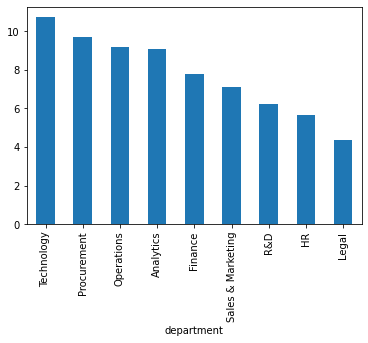

In [277]:
# % promotion in each department
department_is_promoted = X_train.groupby('department')['is_promoted'].mean()*100
department_is_promoted.sort_values(ascending=False,inplace=True)
department_is_promoted.plot(kind='bar')



*   Technology department have highest no. of promotion among all department.
*   Legal have the least number of promotion in its department




<AxesSubplot:ylabel='region'>

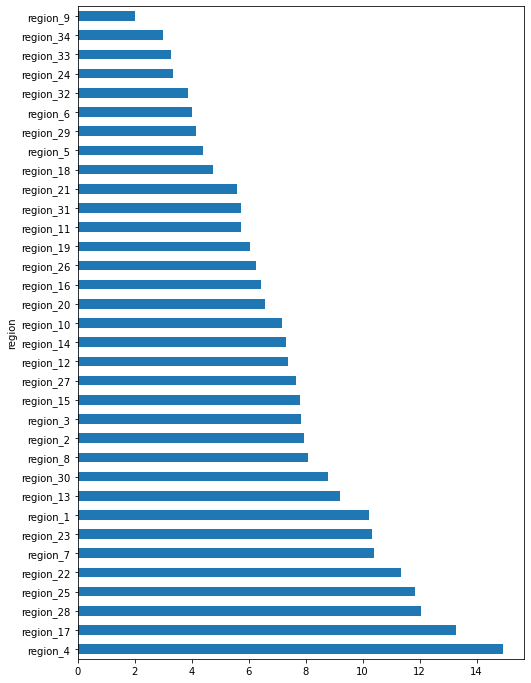

In [278]:
# % promotion in each region
region_is_promoted = X_train.groupby('region')['is_promoted'].mean()*100
region_is_promoted.sort_values(ascending=False,inplace=True)
region_is_promoted.plot(kind='barh',figsize=(8,12))



*   Region 4
*   Region 17 

have highest number of promotion in it’s region.
Which shows maybe there are more young employees or there are employees who are doing really good. 


*   Region 9 

have the lowest number of promotion, maybe beacause employee are not performing well.


<AxesSubplot:xlabel='education_NA'>

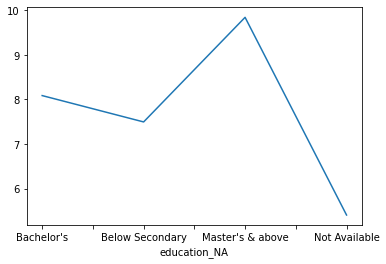

In [279]:
# % promotion of employee in each education
education_is_promoted = X_train.groupby('education_NA')['is_promoted'].mean()*100
education_is_promoted.plot(kind='line')

Master's Degree have higher chances of promotion
Maximum possibility is because masters people tend to have more knowledge which can result in good performance which finally results in promotion.

**Masters > Bachelors > Below Secondary**

<AxesSubplot:xlabel='recruitment_channel'>

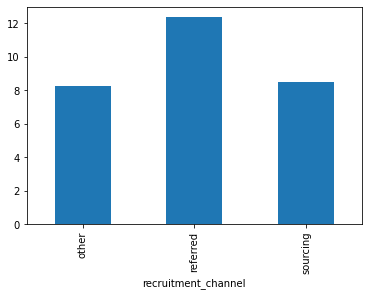

In [280]:
# % promotion of employee hired from different methods
recruitment_is_promoted = X_train.groupby('recruitment_channel')['is_promoted'].mean()*100
recruitment_is_promoted.plot(kind='bar')

This shows that employee coming from referrence recruitment are nice and are getting promotion more comparitive to others.

We usually see people refer people who are really good, since refering good people can be awarded with referal amount.


<AxesSubplot:xlabel='length_of_service'>

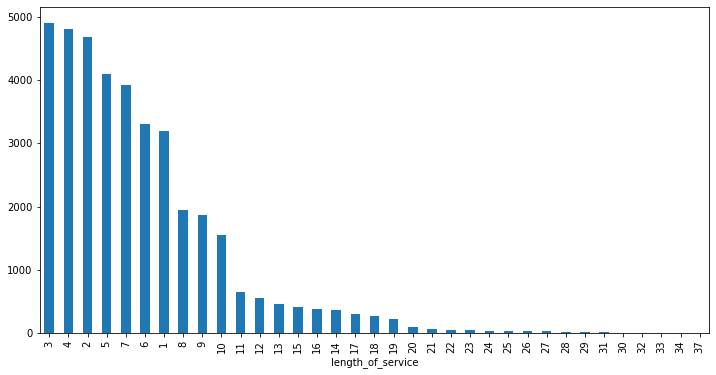

In [281]:
# no. of promotion in each length of service
los_is_promoted = X_train.groupby('length_of_service')['is_promoted'].count()
los_is_promoted.sort_values(ascending=False,inplace=True)
los_is_promoted.plot(kind='bar',figsize=(12,6))

1. Promotion is at peak when you are in 2-5 years of your service length.

2. Promotion decreases as your length of service increases from 8 years since people would already be on top position by then, and there is always less promotion at top.


<AxesSubplot:xlabel='avg_training_score'>

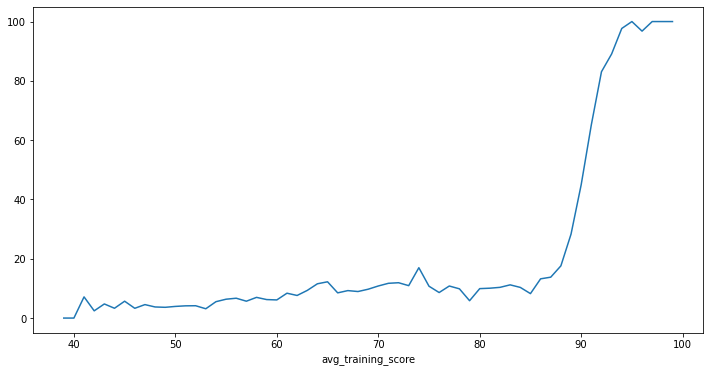

In [282]:
# promotion % based on training score
ats_is_promoted = X_train.groupby('avg_training_score')['is_promoted'].mean()*100
ats_is_promoted.plot(kind='line',figsize=(12,6))

We can clearly see that having more Average training score increases the chance of promotion.

It’s obvious also that if employee does good in training, there is a high probability that he will perform good. 


<AxesSubplot:xlabel='no_of_trainings'>

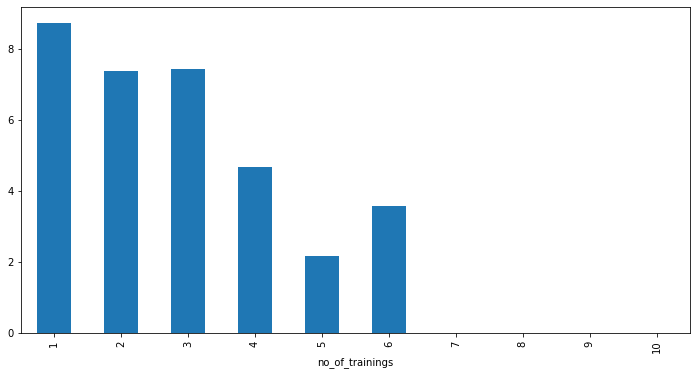

In [283]:
# % promotion based on no. of trainings
training_is_promoted = X_train.groupby('no_of_trainings')['is_promoted'].mean()*100
training_is_promoted.plot(kind='bar',figsize=(12,6))

From this we can see that people with more no. of training are less likely to get promoted, which would be happening because people who could not perform well are doing trainings again and again to improve thier work.


In [284]:
#to check award won by people who met KPI >80%
X_train.groupby('awards_won?')['KPIs_met >80%'].mean()

awards_won?
0    0.346529
1    0.646189
Name: KPIs_met >80%, dtype: float64

64% of people who won award have KPI_met > 80%
That means getting award have one of parameter as KPI_met

<AxesSubplot:xlabel='age'>

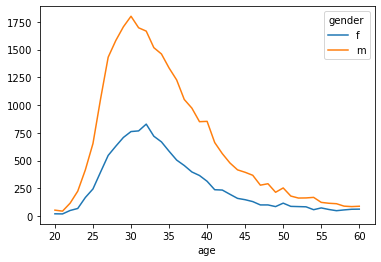

In [285]:
# Gender and age wise promotion
age_gender_promotion = X_train.groupby(['age','gender'])['is_promoted'].count().unstack()
age_gender_promotion.plot(kind='line')

<AxesSubplot:xlabel='age'>

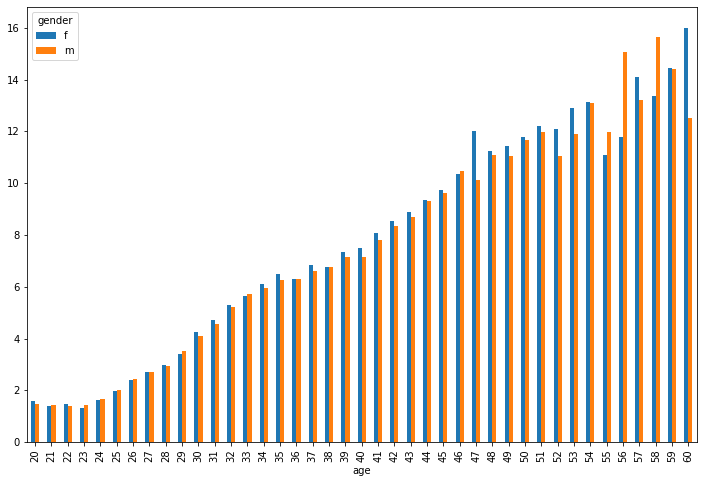

In [286]:
# average length of service in each age by gender
age_gender_los = X_train.groupby(['age','gender'])['length_of_service'].mean().unstack()
age_gender_los.plot(kind='bar',figsize=(12,8))

This shows that there is no difference in length of service on basis of gender, both male and female are nearly equal at all age.


<AxesSubplot:xlabel='education'>

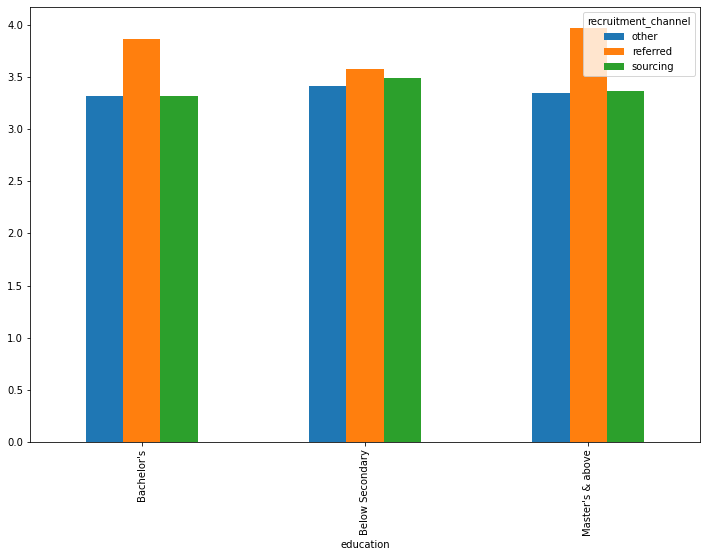

In [287]:
# previous year rating average in each education and recruitment channel
edu_recruit_rating = X_train.groupby(['education','recruitment_channel'])['previous_year_rating_na'].mean().unstack()
edu_recruit_rating.plot(kind='bar',figsize=(12,8))

Employee recruited by Referrence have better rating.

People usually refer good employee who give good performace and which eventually results in good rating.


<AxesSubplot:xlabel='region'>

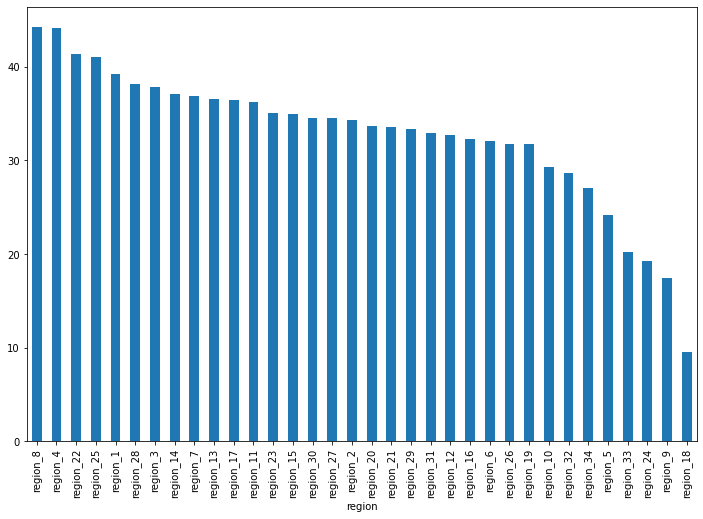

In [288]:
# % Employee who met KPI>80% in each region
region_kpi = X_train.groupby('region')['KPIs_met >80%'].mean()*100
region_kpi.sort_values(ascending = False,inplace=True)
region_kpi.plot(kind='bar',figsize=(12,8))

1. Region 18
2. Region 9
3. Region 24
4. Region 33 

have relatively less no. of KPI>80, Efficiency is less of this region employee is not good. Updates or report should be taken from this region.


<AxesSubplot:title={'center':'department vs rating'}, xlabel='Department', ylabel='Mean rating'>

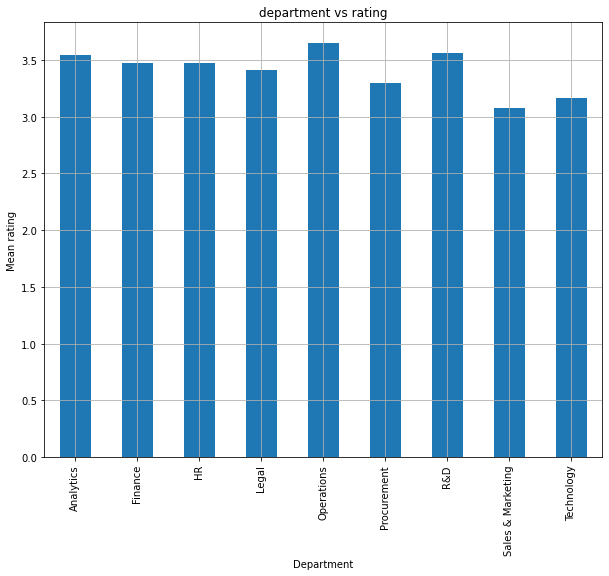

In [289]:
# previous year rating average in each department
department_rating = X_train.groupby('department')['previous_year_rating'].mean()
department_rating.plot(kind='bar',grid=True,title='department vs rating', ylabel='Mean rating',
         xlabel='Department', figsize=(10, 8))

1. Operation
2. Analytics
3. R & D

have best ratings in all department


<AxesSubplot:title={'center':'department vs age'}, xlabel='Department', ylabel='Mean age'>

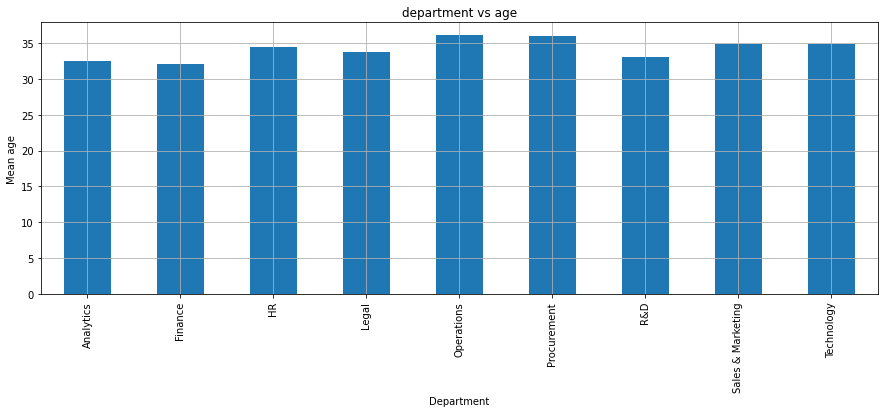

In [290]:
# average age in each department
department_age = X_train.groupby('department')['age'].mean()
department_age.plot(kind='bar',grid=True,title='department vs age', ylabel='Mean age',
         xlabel='Department', figsize=(15, 5))

1. Finance
2. Analytics
3. R&D

have younger average age of employees


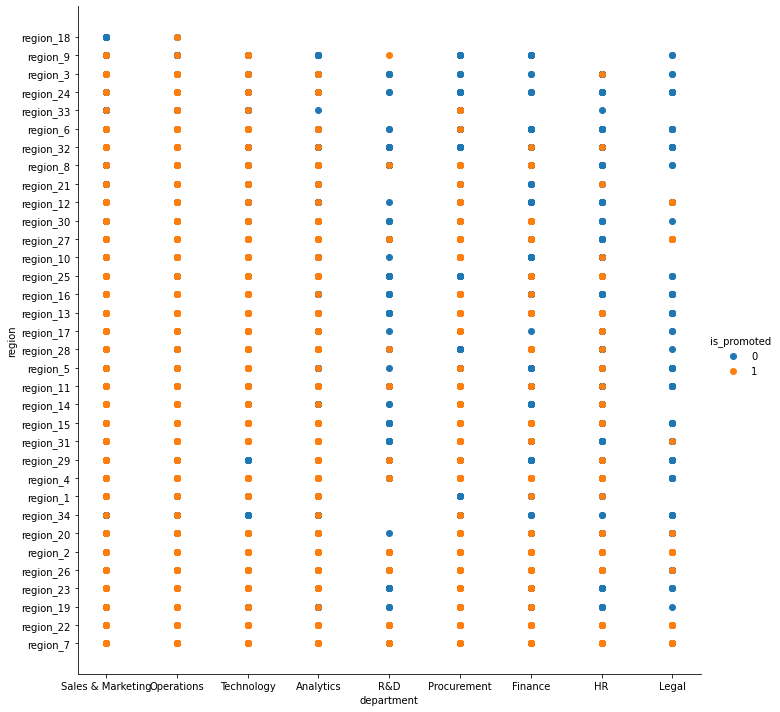

In [291]:
# promotion based on department and region
sns.FacetGrid(X_train,hue='is_promoted',height=10).map(plt.scatter,"department","region").add_legend()

Promotion in 

Sales & Marketing,
Operation,
Technology,
Analytics 

is very low, since this field need experience which can be gained with years.


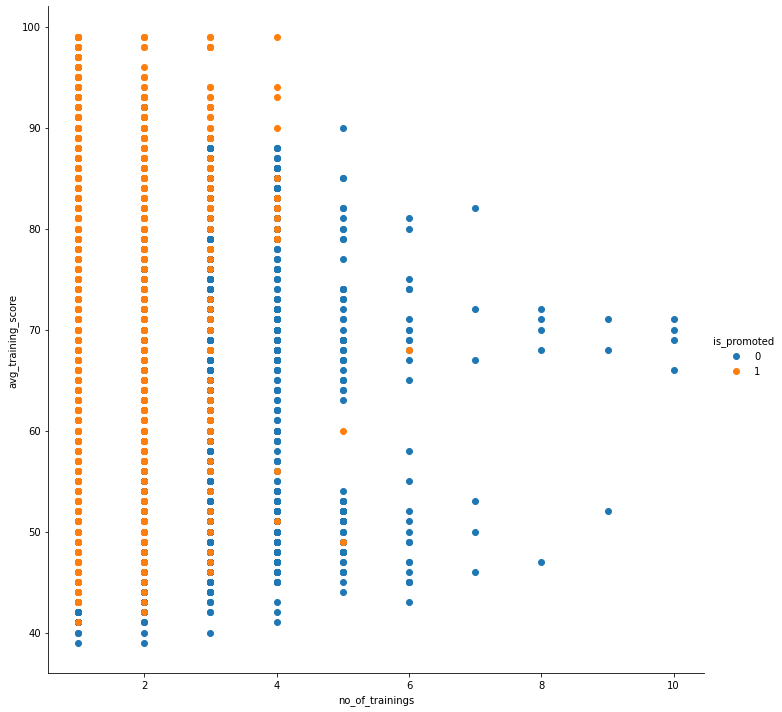

In [292]:
# promotion based on no of trainings and average score
sns.FacetGrid(X_train,hue='is_promoted',height=10).map(plt.scatter,"no_of_trainings","avg_training_score").add_legend()

People with more number of trainings have less chance of promotion, and also getting more training is not increasing thier training score, infact it’s approximately same.

More no. of training don’t make a employee better, there is high chance people have more training beacause they are not performing well. Taking training again and again shows employee is not very good.


#### Outliers

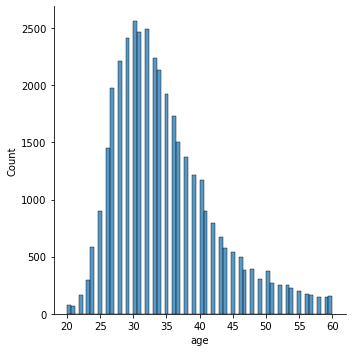

In [293]:
# distplot of age column
sns.displot(X_train['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2261bffee20>,
 'caps': [<matplotlib.lines.Line2D at 0x2261bed3520>,
 'boxes': [<matplotlib.lines.Line2D at 0x2261bffeac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2261bed3bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2261bed3ee0>],
 'means': []}

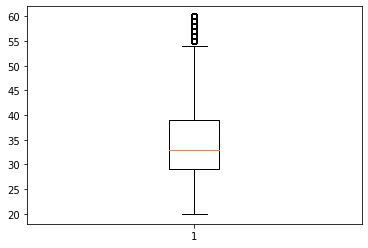

In [294]:
# box plot of age column
plt.boxplot(X_train['age'])

In [295]:
q_25 = percentile(X_train['age'], 25)   # 25 percentile
q_75 = percentile(X_train['age'], 75)   # 75 percentile
IQR = q_75 - q_25   #IQR
cut_off = IQR * 1.5
lower_cut = q_25 - cut_off # lower cut
upper_cut = q_75 + cut_off # upper cut
print(f"Lower : {lower_cut}")
print(f"Upper : {upper_cut}")
outliers = [x for x in X_train['age'] if x < lower_cut or x > upper_cut]
print('Identified outliers: %d' % len(outliers)) # Length of outliers found
unique_outliers = set(outliers)
print(unique_outliers)
outliers_removed = [x for x in X_train['age'] if x >= lower_cut and x <= upper_cut]
print('Non-outlier observations: %d' % len(outliers_removed))

Lower : 14.0
Upper : 54.0
Identified outliers: 981
{55, 56, 57, 58, 59, 60}
Non-outlier observations: 37384


Now, we can see that 55 to 60 is showing as outlier, but the thing is reteriment age for any company is nearly 60 in india, so I am deciding to keep this and not remove, or This outliers shows that people are highly motivated to work in this company in thier 50's.

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

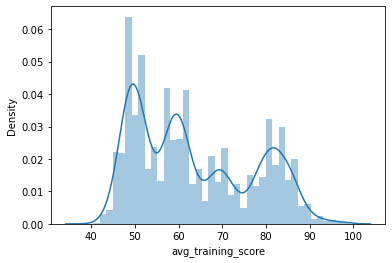

In [296]:
#Distplot of average trining score
sns.distplot(X_train['avg_training_score'])

We can see maximium employee score in 3 ranges.

1. Approx 50
2. Approx 60
3. Approx 80


#### Feature Engneering

In [297]:
X_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Master's & above,Master's & above,5.0,5.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Bachelor's,Bachelor's,5.0,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Bachelor's,Bachelor's,3.0,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Bachelor's,Bachelor's,1.0,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Bachelor's,Bachelor's,3.0,3.0


##### New Features

1. 'score>90' : Who have score more than in 89 in training

In [298]:
X_train['score>90'] = np.where(X_train['avg_training_score']>89,1,0) # mapping score more than 89 as 1

Made this feature since, having score more than 90% increases chance of promotion

2. 'regional_promotion' : Region wise promotion

In [299]:
region_is_promoted_dic = region_is_promoted.to_dict() # converting to dictonary

In [300]:
# % promotion in region > 12 would be 3, >7 would 2 , or 1
for key in region_is_promoted_dic:
    if(region_is_promoted_dic[key]>12):
        region_is_promoted_dic[key] = 3
    elif (region_is_promoted_dic[key]>7):
        region_is_promoted_dic[key] = 2
    else:
        region_is_promoted_dic[key] = 1

Since in EDA we saw there is a group of region which have good,moderate,less no. of promotion

In [301]:
X_train['regional_promotion'] = X_train['region'].map(region_is_promoted_dic)

3. 'promotion_on_trainings' : Promotion based on no. of training

In [302]:
training_is_promoted = training_is_promoted.to_dict()

In [303]:
# less tha 4 training as 2 , less than 7 training is 1 , else 0
for key in training_is_promoted:
    if(key<4):
        training_is_promoted[key] = 2
    elif (key<7):
        training_is_promoted[key] = 1
    else:
        training_is_promoted[key] = 0

Made this feature, since less no. of training increases chance of promotion

In [304]:
X_train['promotion_on_trainings'] = X_train['no_of_trainings'].map(training_is_promoted)

4. 'promotion_on_lengthOfService' : Promotion based on length of service

In [305]:
los_is_promoted_dic = los_is_promoted.to_dict()

In [306]:
# length of service more than 1 and less than 6 is 3 , 7 to 10 as 2, else 1
for key in los_is_promoted_dic:
    if(key>1 and key<6):
        los_is_promoted_dic[key] = 3
    elif (key>6 and key<11):
        los_is_promoted_dic[key] = 2
    else:
        los_is_promoted_dic[key] = 1

Made this feature, since there is a pattern of promotion acc. to length of service

In [307]:
X_train['promotion_on_lengthOfService'] = X_train['length_of_service'].map(los_is_promoted_dic)

5. 'recruitment_rank' : based on no. of promotion

In [308]:
# recruitment channel ranking w.r.t promotion , since referred>sourcing>other
recruitment_rank_dic = {'referred' : 3, 'sourcing' : 2, 'other' : 1}
X_train['recruitment_rank'] = X_train['recruitment_channel'].map(recruitment_rank_dic)

##### Encoding old categorical features

In [309]:
# Male encoding
gender_dic = {'m' : 1 , 'f' : 0}
X_train.loc[:,'gender'] = X_train['gender'].map(gender_dic)

In [310]:
X_train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,is_promoted,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,...,0,Master's & above,Master's & above,5.0,5.0,0,2,2,2,2
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,...,0,Bachelor's,Bachelor's,5.0,5.0,0,2,2,3,1


In [451]:
education_dic_na

{"Bachelor's": 0.08086746612677154,
 'Below Secondary': 0.07495429616087751,
 "Master's & above": 0.0984251968503937,
 'Not Available': 0.05406976744186046}

In [311]:
# Target encoding on department
department_dic = X_train.groupby('department').is_promoted.mean().to_dict()
X_train.loc[:,'department'] = X_train['department'].map(department_dic)

In [312]:
X_train['education_mode'].value_counts()

Bachelor's          27404
Master's & above    10414
Below Secondary       547
Name: education_mode, dtype: int64

In [313]:
# Ordinal encoding on education
education_dic_mode = {"Below Secondary" : 1 , "Bachelor's" : 2 , "Master's & above" : 3}
X_train.loc[:,'education_mode'] = X_train['education_mode'].map(education_dic_mode)

In [314]:
# Target encoding on education
education_dic_na = X_train.groupby('education_NA').is_promoted.mean().to_dict()
X_train.loc[:,'education_NA'] = X_train['education_NA'].map(education_dic_na)

In [315]:
# Target encoding on region
region_dic = X_train.groupby('region').is_promoted.mean().to_dict()
X_train.loc[:,'region'] = X_train['region'].map(region_dic)

In [316]:
# Target encoding in recruitment channel
recruitment_channel_dic = X_train.groupby('recruitment_channel').is_promoted.mean().to_dict()
X_train.loc[:,'recruitment_channel'] = X_train['recruitment_channel'].map(recruitment_channel_dic)

In [317]:
X_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,is_promoted,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
0,65438,0.070888,0.103888,Master's & above,0,0.084834,1,35,5.0,8,...,0,0.098425,3,5.0,5.0,0,2,2,2,2
1,65141,0.092049,0.113404,Bachelor's,1,0.082518,1,30,5.0,4,...,0,0.080867,2,5.0,5.0,0,2,2,3,1
2,7513,0.070888,0.060556,Bachelor's,1,0.084834,1,34,3.0,7,...,0,0.080867,2,3.0,3.0,0,1,2,2,2
3,2542,0.070888,0.103325,Bachelor's,1,0.082518,2,39,1.0,10,...,0,0.080867,2,1.0,1.0,0,2,2,2,1
4,48945,0.107379,0.062619,Bachelor's,1,0.082518,1,45,3.0,2,...,0,0.080867,2,3.0,3.0,0,1,2,3,1


In [318]:
X_train.isnull().sum() # checking null

employee_id                          0
department                           0
region                               0
education                         1720
gender                               0
recruitment_channel                  0
no_of_trainings                      0
age                                  0
previous_year_rating              2907
length_of_service                    0
KPIs_met >80%                        0
awards_won?                          0
avg_training_score                   0
is_promoted                          0
education_NA                         0
education_mode                       0
previous_year_rating_na              0
previous_year_rating_na_median       0
score>90                             0
regional_promotion                   0
promotion_on_trainings               0
promotion_on_lengthOfService         0
recruitment_rank                     0
dtype: int64

No Null, education and previous_year_rating null impuation is done as another feature

In [319]:
X_train.drop(columns = ['education','previous_year_rating'],inplace=True) #removing it as other non-null feature is created from it



 
#### **X_validation and X_test Preprocessing and Feature Engneering**



In [320]:
X_validation.isnull().sum()

employee_id               0
department                0
region                    0
education               341
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    626
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

In [321]:
X_test.isnull().sum()

employee_id               0
department                0
region                    0
education               348
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    591
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

In [322]:
# Education null imputation

X_validation['education_NA'] = X_validation.loc[:,'education'].fillna('Not Available')
X_validation['education_mode'] = X_validation.loc[:,'education'].fillna(education_column_mode)

X_test['education_NA'] = X_test.loc[:,'education'].fillna('Not Available')
X_test['education_mode'] = X_test.loc[:,'education'].fillna(education_column_mode)

In [323]:
# Previous year rating null imputation

X_validation['previous_year_rating_na'] = np.where(X_validation['previous_year_rating'].isnull(),X_validation.apply(new_rating,axis=1),X_validation['previous_year_rating'])
X_validation['previous_year_rating_na_median'] = X_validation.loc[:,'previous_year_rating'].fillna(previous_year_rating_median)

X_test['previous_year_rating_na'] = np.where(X_test['previous_year_rating'].isnull(),X_test.apply(new_rating,axis=1),X_test['previous_year_rating'])
X_test['previous_year_rating_na_median'] = X_test.loc[:,'previous_year_rating'].fillna(previous_year_rating_median)

In [324]:
# New features added

X_validation['score>90'] = np.where(X_validation['avg_training_score']>89,1,0)
X_validation['regional_promotion'] = X_validation['region'].map(region_is_promoted_dic)
X_validation['promotion_on_trainings'] = X_validation['no_of_trainings'].map(training_is_promoted)
X_validation['promotion_on_lengthOfService'] = X_validation['length_of_service'].map(los_is_promoted_dic)
X_validation['recruitment_rank'] = X_validation['recruitment_channel'].map(recruitment_rank_dic)

X_test['score>90'] = np.where(X_test['avg_training_score']>89,1,0)
X_test['regional_promotion'] = X_test['region'].map(region_is_promoted_dic)
X_test['promotion_on_trainings'] = X_test['no_of_trainings'].map(training_is_promoted)
X_test['promotion_on_lengthOfService'] = X_test['length_of_service'].map(los_is_promoted_dic)
X_test['recruitment_rank'] = X_test['recruitment_channel'].map(recruitment_rank_dic)

In [325]:
# All encodings

X_validation['gender'] = X_validation['gender'].map(gender_dic)
X_validation.loc[:,'department'] = X_validation['department'].map(department_dic)
X_validation.loc[:,'education_mode'] = X_validation['education_mode'].map(education_dic_mode)
X_validation.loc[:,'education_NA'] = X_validation['education_NA'].map(education_dic_na)
X_validation.loc[:,'region'] = X_validation['region'].map(region_dic)
X_validation.loc[:,'recruitment_channel'] = X_validation['recruitment_channel'].map(recruitment_channel_dic)

X_test['gender'] = X_test['gender'].map(gender_dic)
X_test.loc[:,'department'] = X_test['department'].map(department_dic)
X_test.loc[:,'education_mode'] = X_test['education_mode'].map(education_dic_mode)
X_test.loc[:,'education_NA'] = X_test['education_NA'].map(education_dic_na)
X_test.loc[:,'region'] = X_test['region'].map(region_dic)
X_test.loc[:,'recruitment_channel'] = X_test['recruitment_channel'].map(recruitment_channel_dic)

In [326]:
# Removing old features having null which is already imputed as another feature

X_validation.drop(columns = ['education','previous_year_rating'],inplace=True)
X_validation.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,...,is_promoted,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
38365,74233,0.070888,0.043956,0,0.084834,1,26,1,0,0,...,0,0.080867,2,3.143418,3.0,0,1,2,1,2
38366,29616,0.070888,0.079461,1,0.084834,3,34,9,0,0,...,0,0.080867,2,4.000000,4.0,0,2,2,2,2
38367,40167,0.092049,0.079461,1,0.082518,2,34,2,0,0,...,0,0.098425,3,4.000000,4.0,0,2,2,3,1
38368,61052,0.070888,0.077915,1,0.082518,1,39,3,0,0,...,0,0.080867,2,4.000000,4.0,0,2,2,3,1
38369,48327,0.107379,0.043956,1,0.084834,1,24,1,1,0,...,0,0.080867,2,3.188243,3.0,0,1,2,1,2


In [327]:
# Removing old features having null which is already imputed as another feature

X_test.drop(columns = ['education','previous_year_rating'],inplace=True)
X_test.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,...,is_promoted,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
46586,66102,0.070888,0.088036,1,0.082518,1,40,9,0,0,...,0,0.080867,2,5.0,5.0,0,2,2,2,1
46587,59945,0.070888,0.020134,0,0.082518,1,31,5,0,0,...,0,0.080867,2,1.0,1.0,0,1,2,3,1
46588,57636,0.092049,0.079461,1,0.084834,1,46,7,1,0,...,0,0.080867,2,3.0,3.0,0,2,2,2,2
46589,49121,0.107379,0.062619,1,0.082518,1,28,4,0,0,...,0,0.080867,2,1.0,1.0,0,1,2,3,1
46590,54015,0.070888,0.079461,1,0.082518,2,32,7,0,0,...,0,0.080867,2,5.0,5.0,0,2,2,2,1


In [328]:
#Seprating features and target in train, validation and test

#Train
x_train = X_train.drop(columns=['is_promoted'])
y_train = X_train['is_promoted']

#Validation
x_val = X_validation.drop(columns=['is_promoted'])
y_val = X_validation['is_promoted']

#Test
x_test = X_test.drop(columns=['is_promoted'])
y_test = X_test['is_promoted']

#### Feature Scaling

In [329]:
# Training

scaler = MinMaxScaler() # create an object
x_train_scaled = scaler.fit_transform(x_train) # fit the scaler to the train set, and then transform it
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns) # converting back to dataframe
x_train_scaled.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
0,0.835762,0.427911,0.649025,0.0,0.056183,0.000000,0.375,0.194444,1.0,0.0,0.166667,1.000000,1.0,1.0,1.0,0.0,0.5,1.0,0.5,0.5
1,0.831969,0.759664,0.722766,1.0,0.000000,0.000000,0.250,0.083333,0.0,0.0,0.350000,0.604158,0.5,1.0,1.0,0.0,0.5,1.0,1.0,0.0
2,0.095932,0.427911,0.313239,1.0,0.056183,0.000000,0.350,0.166667,0.0,0.0,0.183333,0.604158,0.5,0.5,0.5,0.0,0.0,1.0,0.5,0.5
3,0.032441,0.427911,0.644663,1.0,0.000000,0.111111,0.475,0.250000,0.0,0.0,0.183333,0.604158,0.5,0.0,0.0,0.0,0.5,1.0,0.5,0.0
4,0.625110,1.000000,0.329219,1.0,0.000000,0.000000,0.625,0.027778,0.0,0.0,0.566667,0.604158,0.5,0.5,0.5,0.0,0.0,1.0,1.0,0.0


In [330]:
# Validation

x_val_scaled = scaler.transform(x_val) #  transform it
x_val_scaled = pd.DataFrame(x_val_scaled, columns = x_val.columns) # converting back to dataframe
x_val_scaled.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
0,0.948094,0.427911,0.184599,0.0,0.056183,0.000000,0.150,0.000000,0.0,0.0,0.150000,0.604158,0.5,0.535854,0.50,0.0,0.0,1.0,0.0,0.5
1,0.378236,0.427911,0.459733,1.0,0.056183,0.222222,0.350,0.222222,0.0,0.0,0.183333,0.604158,0.5,0.750000,0.75,0.0,0.5,1.0,0.5,0.5
2,0.512996,0.759664,0.459733,1.0,0.000000,0.111111,0.350,0.027778,0.0,0.0,0.366667,1.000000,1.0,0.750000,0.75,0.0,0.5,1.0,1.0,0.0
3,0.779743,0.427911,0.447756,1.0,0.000000,0.000000,0.475,0.055556,0.0,0.0,0.116667,0.604158,0.5,0.750000,0.75,0.0,0.5,1.0,1.0,0.0
4,0.617217,1.000000,0.184599,1.0,0.056183,0.000000,0.100,0.000000,1.0,0.0,0.683333,0.604158,0.5,0.547061,0.50,0.0,0.0,1.0,0.0,0.5


In [331]:
# Test

x_test_scaled = scaler.transform(x_test) #  transform it
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns) # converting back to dataframe
x_test_scaled.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
0,0.844243,0.427911,0.526183,1.0,0.000000,0.000000,0.500,0.222222,0.0,0.0,0.166667,0.604158,0.5,1.0,1.0,0.0,0.5,1.0,0.5,0.0
1,0.765604,0.427911,0.000000,0.0,0.000000,0.000000,0.275,0.111111,0.0,0.0,0.216667,0.604158,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.736113,0.759664,0.459733,1.0,0.056183,0.000000,0.650,0.166667,1.0,0.0,0.400000,0.604158,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.5
3,0.627358,1.000000,0.329219,1.0,0.000000,0.000000,0.200,0.083333,0.0,0.0,0.683333,0.604158,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.689865,0.427911,0.459733,1.0,0.000000,0.111111,0.300,0.166667,0.0,0.0,0.133333,0.604158,0.5,1.0,1.0,0.0,0.5,1.0,0.5,0.0


#### Feature Selection


In [332]:
x_train_scaled.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
0,0.835762,0.427911,0.649025,0.0,0.056183,0.000000,0.375,0.194444,1.0,0.0,0.166667,1.000000,1.0,1.0,1.0,0.0,0.5,1.0,0.5,0.5
1,0.831969,0.759664,0.722766,1.0,0.000000,0.000000,0.250,0.083333,0.0,0.0,0.350000,0.604158,0.5,1.0,1.0,0.0,0.5,1.0,1.0,0.0
2,0.095932,0.427911,0.313239,1.0,0.056183,0.000000,0.350,0.166667,0.0,0.0,0.183333,0.604158,0.5,0.5,0.5,0.0,0.0,1.0,0.5,0.5
3,0.032441,0.427911,0.644663,1.0,0.000000,0.111111,0.475,0.250000,0.0,0.0,0.183333,0.604158,0.5,0.0,0.0,0.0,0.5,1.0,0.5,0.0
4,0.625110,1.000000,0.329219,1.0,0.000000,0.000000,0.625,0.027778,0.0,0.0,0.566667,0.604158,0.5,0.5,0.5,0.0,0.0,1.0,1.0,0.0


##### Filter Method

1.   Correlation Matrix



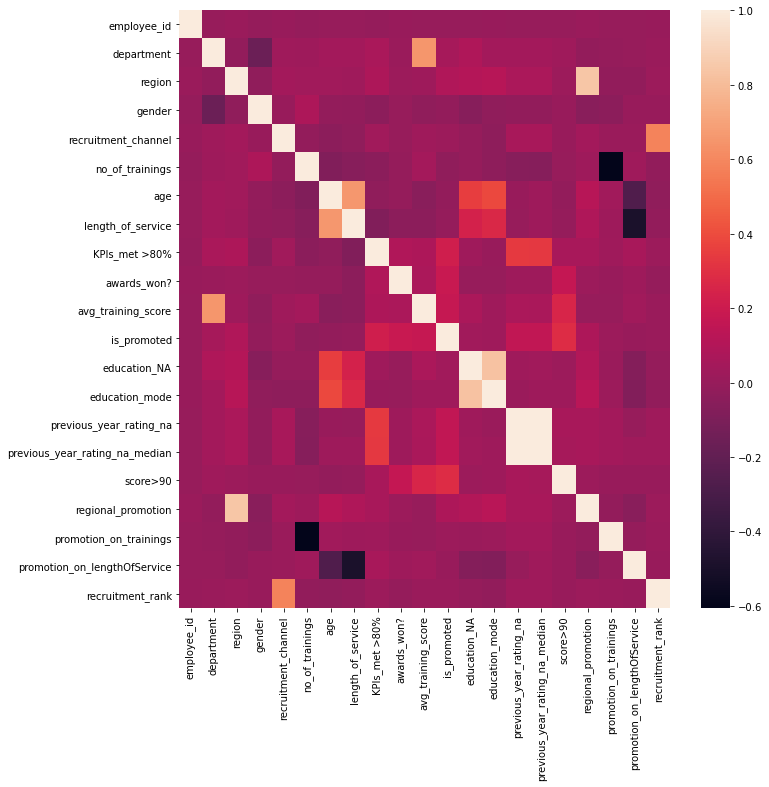

In [333]:
corr_features = set()
# create the correlation matrix (default to pearson)
corr_matrix = X_train.corr()
# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.90:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

In [334]:
corr_features

{'previous_year_rating_na_median'}

Checking Corelation between null columns we made and target, so that we can keep one.

In [335]:
print(f"education_NA : {corr_matrix.loc['education_NA', 'is_promoted']}")
print(f"education_mode : {corr_matrix.loc['education_mode', 'is_promoted']}")

education_NA : 0.036741663489285495
education_mode : 0.030373288121805987


education_mode have less corelation with is_promoted

In [336]:
print(f"previous_year_rating_na : {corr_matrix.loc['previous_year_rating_na', 'is_promoted']}")
print(f"previous_year_rating_na_median : {corr_matrix.loc['previous_year_rating_na_median', 'is_promoted']}")

previous_year_rating_na : 0.15551528020503272
previous_year_rating_na_median : 0.155043043855513


previous_year_rating_na_median  have less corelation with is_promoted

In [337]:
x_train_scaled.drop(labels=['education_mode','employee_id'], axis=1, inplace=True)
x_train_scaled.drop(labels=corr_features, axis=1, inplace=True)

x_val_scaled.drop(labels=['education_mode','employee_id'], axis=1, inplace=True)
x_val_scaled.drop(labels=corr_features, axis=1, inplace=True)

x_test_scaled.drop(labels=['education_mode','employee_id'], axis=1, inplace=True)
x_test_scaled.drop(labels=corr_features, axis=1, inplace=True)

In [338]:
x_train.drop(labels=['education_mode','employee_id'], axis=1, inplace=True)
x_train.drop(labels=corr_features, axis=1, inplace=True)

x_val.drop(labels=['education_mode','employee_id'], axis=1, inplace=True)
x_val.drop(labels=corr_features, axis=1, inplace=True)

x_test.drop(labels=['education_mode','employee_id'], axis=1, inplace=True)
x_test.drop(labels=corr_features, axis=1, inplace=True)



2.   Using SelectKBest



In [339]:
x_train_scaled.columns

Index(['department', 'region', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'education_NA',
       'previous_year_rating_na', 'score>90', 'regional_promotion',
       'promotion_on_trainings', 'promotion_on_lengthOfService',
       'recruitment_rank'],
      dtype='object')

In [340]:
# select the number of features you want to retain.
select_k = 10
features = {}
for algo in [mutual_info_classif,chi2,f_classif]:
  # create the SelectKBest 
  selection = SelectKBest(algo, k=select_k).fit(x_train_scaled, y_train)
  # display the retained features.
  features[algo] = x_train_scaled.columns[selection.get_support()]
  print(f"\n \nTop {select_k} features selected by {algo} : \n \n")
  print(features[algo])
  print('-'*100)
mic_set = set(features[mutual_info_classif])
chi_set = set(features[chi2])
fc_set = set(features[f_classif])
my_set = mic_set.intersection(chi_set)
final_set = my_set.intersection(fc_set)
feature_by_SelectKBest = list(final_set)
print("\n \nCommon Features selected in SelectKBest :")
print(feature_by_SelectKBest)


 
Top 10 features selected by <function mutual_info_classif at 0x0000022612DDA160> : 
 

Index(['department', 'region', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'education_NA', 'previous_year_rating_na',
       'score>90', 'regional_promotion', 'promotion_on_trainings'],
      dtype='object')
----------------------------------------------------------------------------------------------------

 
Top 10 features selected by <function chi2 at 0x0000022612B90B80> : 
 

Index(['department', 'region', 'recruitment_channel', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'education_NA',
       'previous_year_rating_na', 'score>90', 'regional_promotion'],
      dtype='object')
----------------------------------------------------------------------------------------------------

 
Top 10 features selected by <function f_classif at 0x0000022612B90A60> : 
 

Index(['department', 'region', 'no_of_trainings', 'KPIs_met >80%',
       'awards_won?', 'avg_training_sco

3. Univariate ROC-AUC



In [341]:
# list of the resulting scores.
roc_values = []

# loop over all features and calculate the score.
for feature in x_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(x_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(x_val[feature].to_frame())
    roc_values.append(roc_auc_score(y_val, y_scored[:, 1]))

# create a Pandas Series for visualisation.
roc_values = pd.Series(roc_values)
roc_values.index = x_train_scaled.columns

# show the results.
print(roc_values.sort_values(ascending=False))

# Selecting top 10 Features
print("\n \nTop 10 Features selected in Univariate ROC-AUC :")
features_by_UnivariateROCAUC = list(roc_values.sort_values(ascending=False)[:10].index)
print(features_by_UnivariateROCAUC)

KPIs_met >80%                   0.677759
avg_training_score              0.663619
previous_year_rating_na         0.633412
region                          0.571083
score>90                        0.561596
awards_won?                     0.555025
regional_promotion              0.550911
department                      0.540645
gender                          0.522902
education_NA                    0.521806
promotion_on_lengthOfService    0.517849
length_of_service               0.515825
no_of_trainings                 0.514072
age                             0.513884
recruitment_channel             0.503222
recruitment_rank                0.503222
promotion_on_trainings          0.501786
dtype: float64

 
Top 10 Features selected in Univariate ROC-AUC :
['KPIs_met >80%', 'avg_training_score', 'previous_year_rating_na', 'region', 'score>90', 'awards_won?', 'regional_promotion', 'department', 'gender', 'education_NA']


##### Wrapper Method



Forward Feature Selection



In [114]:
sfs = SequentialFeatureSelector(RandomForestClassifier(), 
           k_features=10, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           cv=2)

# fit the object to the training data.
sfs = sfs.fit(x_train_scaled, y_train)

# print the selected features.
features_by_forward = x_train_scaled.columns[list(sfs.k_feature_idx_)]
print(f"Features by Forward Selection : \n \n{features_by_forward}")

# print the final prediction score.
print(f"\n\nPrediction Score : {sfs.k_score_}")

Features by Forward Selection : 
 
Index(['department', 'gender', 'no_of_trainings', 'awards_won?',
       'avg_training_score', 'education_NA', 'score>90', 'regional_promotion',
       'promotion_on_trainings', 'recruitment_rank'],
      dtype='object')


Prediction Score : 0.9352274051559213


To save time, I have wriiten above result in text

Features by Forward Selection : 
 
Index(['department', 'gender', 'no_of_trainings', 'awards_won?',
       'avg_training_score', 'education_NA', 'score>90', 'regional_promotion',
       'promotion_on_trainings', 'recruitment_rank'],
      dtype='object')


Prediction Score : 0.9352274051559213

In [342]:
features_by_forward = ['department', 'gender', 'no_of_trainings', 'awards_won?', 'avg_training_score', 'education_NA', 'score>90', 'regional_promotion', 'promotion_on_trainings', 'recruitment_rank']

##### Embedded Methods



Tree-based Feature Importance (XGB)



In [343]:
model = XGBClassifier()
# fit the model to start training.
model.fit(x_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

importances = pd.Series(importances)
importances.index = x_train.columns

# show the results.
print(importances.sort_values(ascending=False))

# Selecting top 10 Features
print("\n \nTop 10 Features selected in Tree-based Feature Importance :")
features_by_treeBased = list(importances.sort_values(ascending=False)[:10].index)
print(features_by_treeBased)

[18:29:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
KPIs_met >80%                   0.463760
awards_won?                     0.130932
department                      0.118135
avg_training_score              0.094127
previous_year_rating_na         0.043342
region                          0.022101
no_of_trainings                 0.021371
education_NA                    0.020631
gender                          0.018663
length_of_service               0.017998
age                             0.017790
recruitment_channel             0.015678
promotion_on_lengthOfService    0.015472
score>90                        0.000000
regional_promotion              0.000000
promotion_on_trainings          0.000000
recruitment_rank                0.

#### Final Feature Selected



1.   Select K best



In [344]:
feature_by_SelectKBest

['previous_year_rating_na',
 'region',
 'department',
 'score>90',
 'avg_training_score',
 'education_NA',
 'awards_won?',
 'KPIs_met >80%',
 'regional_promotion']

2. Univariate ROCAUC by Decision tree classifier

In [345]:
features_by_UnivariateROCAUC

['KPIs_met >80%',
 'avg_training_score',
 'previous_year_rating_na',
 'region',
 'score>90',
 'awards_won?',
 'regional_promotion',
 'department',
 'gender',
 'education_NA']

3. Forward Feature Selection using Random Forest Classifier

In [346]:
features_by_forward

['department',
 'gender',
 'no_of_trainings',
 'awards_won?',
 'avg_training_score',
 'education_NA',
 'score>90',
 'regional_promotion',
 'promotion_on_trainings',
 'recruitment_rank']

4. Embedded Feature selection using XGB

In [347]:
features_by_treeBased

['KPIs_met >80%',
 'awards_won?',
 'department',
 'avg_training_score',
 'previous_year_rating_na',
 'region',
 'no_of_trainings',
 'education_NA',
 'gender',
 'length_of_service']

### Modelling



#### Distance Based



###### On train

Using feature from SelectKBest in all distance based

In [121]:
for algo in [LogisticRegression(),KNeighborsClassifier()]: #checking for all algo
  classifier = algo
  classifier.fit(x_train_scaled[feature_by_SelectKBest], y_train)      
  y_train_pred = classifier.predict(x_train_scaled[feature_by_SelectKBest]) 
  print(algo)
  print(confusion_matrix(y_train, y_train_pred))
  print(classification_report(y_train, y_train_pred))
  print("\n \n ")

LogisticRegression()
[[34964   165]
 [ 2794   442]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     35129
           1       0.73      0.14      0.23      3236

    accuracy                           0.92     38365
   macro avg       0.83      0.57      0.59     38365
weighted avg       0.91      0.92      0.90     38365


 
 
KNeighborsClassifier()
[[34847   282]
 [ 2452   784]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     35129
           1       0.74      0.24      0.36      3236

    accuracy                           0.93     38365
   macro avg       0.83      0.62      0.66     38365
weighted avg       0.92      0.93      0.91     38365


 
 


###### On Validation

In [122]:
for algo in [LogisticRegression(),KNeighborsClassifier()]:
  classifier = algo
  classifier.fit(x_train_scaled[feature_by_SelectKBest], y_train)
  y_val_pred = classifier.predict(x_val_scaled[feature_by_SelectKBest])
  print(algo)
  print(confusion_matrix(y_val, y_val_pred))
  print(classification_report(y_val, y_val_pred))
  print("\n \n ")

LogisticRegression()
[[7448   38]
 [ 638   97]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7486
           1       0.72      0.13      0.22       735

    accuracy                           0.92      8221
   macro avg       0.82      0.56      0.59      8221
weighted avg       0.90      0.92      0.89      8221


 
 
KNeighborsClassifier()
[[7392   94]
 [ 592  143]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7486
           1       0.60      0.19      0.29       735

    accuracy                           0.92      8221
   macro avg       0.76      0.59      0.62      8221
weighted avg       0.90      0.92      0.90      8221


 
 


###### Data Has a lot of imbalance, Applying different methods to overcome that

##### Handling Imbalanced Data

###### SMOTE

In [123]:
sm = SMOTE()  # SMOTE
X_train_bd, y_train_bd = sm.fit_resample(x_train_scaled, y_train)
X_train_bd = pd.DataFrame(data = X_train_bd,columns=x_train_scaled.columns)


for algo in [LogisticRegression(),KNeighborsClassifier()]:
  classifier = algo
  classifier.fit(X_train_bd[feature_by_SelectKBest], y_train_bd)
  y_val_pred = classifier.predict(x_val_scaled[feature_by_SelectKBest])
  print(algo)
  print(confusion_matrix(y_val, y_val_pred))
  print(classification_report(y_val, y_val_pred))
  print("\n \n ")

LogisticRegression()
[[5487 1999]
 [ 214  521]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7486
           1       0.21      0.71      0.32       735

    accuracy                           0.73      8221
   macro avg       0.58      0.72      0.58      8221
weighted avg       0.89      0.73      0.79      8221


 
 
KNeighborsClassifier()
[[6627  859]
 [ 432  303]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7486
           1       0.26      0.41      0.32       735

    accuracy                           0.84      8221
   macro avg       0.60      0.65      0.62      8221
weighted avg       0.88      0.84      0.86      8221


 
 


###### SOMTETOMEK

In [124]:
smtom = SMOTETomek()  # SMOTETOMEK
X_train_bd, y_train_bd = smtom.fit_resample(x_train_scaled, y_train)
X_train_bd = pd.DataFrame(data = X_train_bd,columns=x_train_scaled.columns)


for algo in [LogisticRegression(),KNeighborsClassifier()]:
  classifier = algo
  classifier.fit(X_train_bd[feature_by_SelectKBest], y_train_bd)
  y_val_pred = classifier.predict(x_val_scaled[feature_by_SelectKBest])
  print(algo)
  print(confusion_matrix(y_val, y_val_pred))
  print(classification_report(y_val, y_val_pred))
  print("\n \n ")

LogisticRegression()
[[5467 2019]
 [ 209  526]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7486
           1       0.21      0.72      0.32       735

    accuracy                           0.73      8221
   macro avg       0.58      0.72      0.58      8221
weighted avg       0.90      0.73      0.79      8221


 
 
KNeighborsClassifier()
[[6612  874]
 [ 427  308]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7486
           1       0.26      0.42      0.32       735

    accuracy                           0.84      8221
   macro avg       0.60      0.65      0.62      8221
weighted avg       0.88      0.84      0.86      8221


 
 


###### SMOTEENN

In [125]:
smoteen = SMOTEENN()  # SMOTEEN
X_train_bd, y_train_bd = smoteen.fit_resample(x_train_scaled, y_train)
X_train_bd = pd.DataFrame(data = X_train_bd,columns=x_train_scaled.columns)


for algo in [LogisticRegression(),KNeighborsClassifier()]:
  classifier = algo
  classifier.fit(X_train_bd[feature_by_SelectKBest], y_train_bd)
  y_val_pred = classifier.predict(x_val_scaled[feature_by_SelectKBest])
  print(algo)
  print(confusion_matrix(y_val, y_val_pred))
  print(classification_report(y_val, y_val_pred))
  print("\n \n ")

LogisticRegression()
[[5038 2448]
 [ 144  591]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.80      7486
           1       0.19      0.80      0.31       735

    accuracy                           0.68      8221
   macro avg       0.58      0.74      0.55      8221
weighted avg       0.90      0.68      0.75      8221


 
 
KNeighborsClassifier()
[[6089 1397]
 [ 312  423]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      7486
           1       0.23      0.58      0.33       735

    accuracy                           0.79      8221
   macro avg       0.59      0.69      0.60      8221
weighted avg       0.89      0.79      0.83      8221


 
 


###### Random Over Sampler

In [127]:
over_sampl =  RandomOverSampler()  # RANDOM OVER SAMPLER

X_train_bd, y_train_bd = over_sampl.fit_resample(x_train_scaled, y_train)
X_train_bd = pd.DataFrame(data = X_train_bd,columns=x_train_scaled.columns)


for algo in [LogisticRegression(),KNeighborsClassifier()]:
  classifier = algo
  classifier.fit(X_train_bd[feature_by_SelectKBest], y_train_bd)
  y_val_pred = classifier.predict(x_val_scaled[feature_by_SelectKBest])
  print(algo)
  print(confusion_matrix(y_val, y_val_pred))
  print(classification_report(y_val, y_val_pred))
  print("\n \n ")

LogisticRegression()
[[5473 2013]
 [ 206  529]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7486
           1       0.21      0.72      0.32       735

    accuracy                           0.73      8221
   macro avg       0.59      0.73      0.58      8221
weighted avg       0.90      0.73      0.79      8221


 
 
KNeighborsClassifier()
[[6452 1034]
 [ 409  326]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7486
           1       0.24      0.44      0.31       735

    accuracy                           0.82      8221
   macro avg       0.59      0.65      0.61      8221
weighted avg       0.88      0.82      0.85      8221


 
 


##### Best Algo selected

In [128]:
smoteen = SMOTEENN() # for balancing selected algo
X_train_bd, y_train_bd = smoteen.fit_resample(x_train_scaled, y_train)
X_train_bd = pd.DataFrame(data = X_train_bd,columns=x_train_scaled.columns)

classifier = KNeighborsClassifier() # KNN is selected
classifier.fit(X_train_bd[feature_by_SelectKBest], y_train_bd)

KNeighborsClassifier()

On train

In [129]:
y_train_pred = classifier.predict(X_train_bd[feature_by_SelectKBest]) # predicting on train
print(confusion_matrix(y_train_bd, y_train_pred))
print(classification_report(y_train_bd, y_train_pred))
print("\n \n ")

[[25719  2129]
 [ 2670 30304]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     27848
           1       0.93      0.92      0.93     32974

    accuracy                           0.92     60822
   macro avg       0.92      0.92      0.92     60822
weighted avg       0.92      0.92      0.92     60822


 
 


On Validation

In [130]:
y_val_pred = classifier.predict(x_val_scaled[feature_by_SelectKBest])  # predicting on validation
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("\n \n ")

[[6104 1382]
 [ 317  418]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7486
           1       0.23      0.57      0.33       735

    accuracy                           0.79      8221
   macro avg       0.59      0.69      0.60      8221
weighted avg       0.89      0.79      0.83      8221


 
 


**We can see a overfitting in this model, lets check we could get good result in tree based algo**

#### Tree Based

In [348]:
# I will be using it as scale_pos_weight
counts = y_train.value_counts() 
ratio = counts[0]/counts[1]
ratio  #ratio of people who are not promoted upon who are promoted

10.855686032138443

##### On train

In [132]:
print("Decision Tree Classifier \n\n")
classifier = DecisionTreeClassifier(class_weight='balanced') # now classes will be weighted inversely proportional to frequently they appear.
classifier.fit(x_train[features_by_UnivariateROCAUC], y_train)
y_train_pred = classifier.predict(x_train[features_by_UnivariateROCAUC])   # using features by UnivariateROCAUC
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("\n \n ")

print("Random Forest Classifier \n\n")
classifier = RandomForestClassifier(class_weight='balanced') # now classes will be weighted inversely proportional to frequently they appear.
classifier.fit(x_train[features_by_forward], y_train)
y_train_pred = classifier.predict(x_train[features_by_forward])  # using features by forward
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("\n \n ")

print("XGB Classifier \n\n")
classifier = XGBClassifier(scale_pos_weight=ratio)   # ratio has been found above
classifier.fit(x_train[features_by_treeBased], y_train)
y_train_pred = classifier.predict(x_train[features_by_treeBased])  # using features by treeBased
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("\n \n ")

print("LGBM Classifier \n\n")
classifier = ltb.LGBMClassifier(scale_pos_weight=ratio)   # ratio has been found above
classifier.fit(x_train[features_by_treeBased], y_train)
y_train_pred = classifier.predict(x_train[features_by_treeBased])  # using features by treeBased
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("\n \n ")

Decision Tree Classifier 


[[33018  2111]
 [    5  3231]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     35129
           1       0.60      1.00      0.75      3236

    accuracy                           0.94     38365
   macro avg       0.80      0.97      0.86     38365
weighted avg       0.97      0.94      0.95     38365


 
 
Random Forest Classifier 


[[31767  3362]
 [ 1076  2160]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     35129
           1       0.39      0.67      0.49      3236

    accuracy                           0.88     38365
   macro avg       0.68      0.79      0.71     38365
weighted avg       0.92      0.88      0.90     38365


 
 
XGB Classifier 


[15:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

##### On Validation

In [133]:
print("Decision Tree Classifier \n\n")
classifier = DecisionTreeClassifier(class_weight='balanced') # now classes will be weighted inversely proportional to frequently they appear.
classifier.fit(x_train[features_by_UnivariateROCAUC], y_train)
y_val_pred = classifier.predict(x_val[features_by_UnivariateROCAUC])
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("\n \n ")

print("Random Forest Classifier \n\n")
classifier = RandomForestClassifier(class_weight='balanced') # now classes will be weighted inversely proportional to frequently they appear.
classifier.fit(x_train[features_by_forward], y_train)
y_val_pred = classifier.predict(x_val[features_by_forward])
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("\n \n ")

print("XGB Classifier \n\n")
classifier = XGBClassifier(scale_pos_weight=ratio)           # ratio has been found above
classifier.fit(x_train[features_by_treeBased], y_train)
y_val_pred = classifier.predict(x_val[features_by_treeBased])
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("\n \n ")

print("LGBM Classifier \n\n")
classifier = ltb.LGBMClassifier(scale_pos_weight=ratio)        # ratio has been found above
classifier.fit(x_train[features_by_treeBased], y_train)
y_val_pred = classifier.predict(x_val[features_by_treeBased])
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("\n \n ")

Decision Tree Classifier 


[[6796  690]
 [ 339  396]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7486
           1       0.36      0.54      0.43       735

    accuracy                           0.87      8221
   macro avg       0.66      0.72      0.68      8221
weighted avg       0.90      0.87      0.89      8221


 
 
Random Forest Classifier 


[[6711  775]
 [ 422  313]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7486
           1       0.29      0.43      0.34       735

    accuracy                           0.85      8221
   macro avg       0.61      0.66      0.63      8221
weighted avg       0.88      0.85      0.87      8221


 
 
XGB Classifier 


[15:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

##### Checking my best model for over fitting

 LBGM on Train
 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     35129
           1       0.27      0.97      0.42      3236

    accuracy                           0.77     38365
   macro avg       0.63      0.86      0.64     38365
weighted avg       0.93      0.77      0.82     38365

LBGM on Validation

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      7486
           1       0.26      0.89      0.40       735

    accuracy                           0.76      8221
   macro avg       0.62      0.82      0.63      8221
weighted avg       0.92      0.76      0.81      8221

**No overfitting as per now, can proceed with hyper parameter tunning**

In [135]:
accuracy=[]   # will contain accuracy
f1=[]         # will contain f1
X = x_train[features_by_treeBased]
Y =  y_train
skf = StratifiedKFold(n_splits=10,random_state=None)  # StratifiedKFold
skf.get_n_splits(X,Y) 
classifier = ltb.LGBMClassifier(scale_pos_weight=ratio)
for train_index, test_index in skf.split(X,Y):
    print("train : ",train_index,"Validation : ",test_index)
    X1_train, X1_test = X.iloc[train_index] , X.iloc[test_index]
    y1_train, y1_test = Y.iloc[train_index] , Y.iloc[test_index]
    classifier.fit(X1_train,y1_train)           # fitting
    prediction = classifier.predict(X1_test)    # predicting
    score = accuracy_score(prediction,y1_test)
    score2 = f1_score(prediction,y1_test,average='macro')
    accuracy.append(score)  # adding all accuracy
    f1.append(score2)       # adding all macro avg f1_score
print("Average Accuracy : ",np.array(accuracy).mean())      # Average accuracy
print("Max Accuracy : ",np.array(accuracy).max())           # Max Accuracy
print("Min Accuracy : ",np.array(accuracy).min())           # Min Accuracy
print("Average F1_score : ",np.array(f1).mean())            # Average F1_score
print("Max F1_score : ",np.array(f1).max())                 # Max F1_score
print("Min F1_score : ",np.array(f1).min())                 # Min F1_score

train :  [ 3635  3642  3644 ... 38362 38363 38364] Validation :  [   0    1    2 ... 3863 3865 3867]
train :  [    0     1     2 ... 38362 38363 38364] Validation :  [3635 3642 3644 ... 7707 7708 7709]
train :  [    0     1     2 ... 38362 38363 38364] Validation :  [ 7384  7389  7401 ... 11575 11576 11577]
train :  [    0     1     2 ... 38362 38363 38364] Validation :  [10851 10860 10869 ... 15363 15364 15366]
train :  [    0     1     2 ... 38362 38363 38364] Validation :  [15154 15161 15164 ... 19195 19196 19197]
train :  [    0     1     2 ... 38362 38363 38364] Validation :  [19065 19067 19069 ... 23018 23019 23020]
train :  [    0     1     2 ... 38362 38363 38364] Validation :  [23021 23022 23023 ... 27194 27206 27218]
train :  [    0     1     2 ... 38362 38363 38364] Validation :  [26816 26817 26818 ... 30833 30839 30844]
train :  [    0     1     2 ... 38362 38363 38364] Validation :  [30679 30680 30681 ... 34643 34663 34679]
train :  [    0     1     2 ... 34643 34663 34679

#### HyperParameter Tunning

#### Light BGM HyperParameter tunning

##### Automatic Hyper Parameter Tunning

In [381]:
from sklearn.model_selection import GridSearchCV
import lightgbm as ltb
classifier = ltb.LGBMClassifier()
gridParams = {
    'scale_pos_weight' : [ratio],
    'num_iterations' : [200,400,600],
    'max_depth' : [4,5,6],
    'learning_rate' : [0.05,0.1,0.5],
    'num_leaves'  : [16,32,64],
    'colsample_bytree': [0.4,0.6, 0.8,1.0]
    }
try:
  grid_search = GridSearchCV(estimator = classifier,
                           param_grid = [gridParams],
                           scoring = 'f1',
                           cv = 5,
                           n_jobs = -1)
  grid_search.fit(x_train[features_by_treeBased], y_train)
except:
  print("some error")

In [382]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.5,
 'max_depth': 6,
 'num_iterations': 600,
 'num_leaves': 64,
 'scale_pos_weight': 10.855686032138443}

In [383]:
y_val_pred = grid_search.predict(x_val[features_by_treeBased])
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

[[7020  466]
 [ 346  389]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7486
           1       0.45      0.53      0.49       735

    accuracy                           0.90      8221
   macro avg       0.70      0.73      0.72      8221
weighted avg       0.91      0.90      0.90      8221



In [167]:
y_train_pred = grid_search.predict(x_train[features_by_treeBased])
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[30372  4757]
 [   28  3208]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     35129
           1       0.40      0.99      0.57      3236

    accuracy                           0.88     38365
   macro avg       0.70      0.93      0.75     38365
weighted avg       0.95      0.88      0.90     38365



##### Manual Hyper Parameter Tunning (Trying to get more good recall)

In [414]:
for x in [100,200,400,600,800]:
    classifier = ltb.LGBMClassifier(scale_pos_weight=ratio,objective='binary',num_iterations=x)
    classifier.fit(x_train[features_by_treeBased], y_train)
    y_val_pred = classifier.predict(x_val[features_by_treeBased])
    print(x)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))

100
[[5610 1876]
 [  78  657]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      7486
           1       0.26      0.89      0.40       735

    accuracy                           0.76      8221
   macro avg       0.62      0.82      0.63      8221
weighted avg       0.92      0.76      0.81      8221

200
[[5865 1621]
 [ 122  613]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      7486
           1       0.27      0.83      0.41       735

    accuracy                           0.79      8221
   macro avg       0.63      0.81      0.64      8221
weighted avg       0.92      0.79      0.83      8221

400
[[6199 1287]
 [ 193  542]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7486
           1       0.30      0.74      0.42       735

    accuracy                           0.82      8221
   macro avg       0.63      0.78  

In [415]:
for x in [4,5,6,]:
    classifier = ltb.LGBMClassifier(scale_pos_weight=ratio,objective='binary',num_iterations=400,max_depth=x)
    classifier.fit(x_train[features_by_treeBased], y_train)
    y_val_pred = classifier.predict(x_val[features_by_treeBased])
    print(x)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))

4
[[5738 1748]
 [  98  637]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7486
           1       0.27      0.87      0.41       735

    accuracy                           0.78      8221
   macro avg       0.63      0.82      0.63      8221
weighted avg       0.92      0.78      0.82      8221

5
[[5905 1581]
 [ 133  602]]
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      7486
           1       0.28      0.82      0.41       735

    accuracy                           0.79      8221
   macro avg       0.63      0.80      0.64      8221
weighted avg       0.92      0.79      0.83      8221

6
[[6065 1421]
 [ 142  593]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7486
           1       0.29      0.81      0.43       735

    accuracy                           0.81      8221
   macro avg       0.64      0.81      0.

In [416]:
for x in [0.01,0.05,0.1,0.5]:
    classifier = ltb.LGBMClassifier(scale_pos_weight=ratio,objective='binary',num_iterations=400,max_depth=6,learning_rate=x)
    classifier.fit(x_train[features_by_treeBased], y_train)
    y_val_pred = classifier.predict(x_val[features_by_treeBased])
    print(x)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))

0.01
[[5290 2196]
 [  58  677]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.82      7486
           1       0.24      0.92      0.38       735

    accuracy                           0.73      8221
   macro avg       0.61      0.81      0.60      8221
weighted avg       0.92      0.73      0.78      8221

0.05
[[5783 1703]
 [ 106  629]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7486
           1       0.27      0.86      0.41       735

    accuracy                           0.78      8221
   macro avg       0.63      0.81      0.64      8221
weighted avg       0.92      0.78      0.82      8221

0.1
[[6065 1421]
 [ 142  593]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7486
           1       0.29      0.81      0.43       735

    accuracy                           0.81      8221
   macro avg       0.64      0.81

In [417]:
for x in [16,32,64]:
    classifier = ltb.LGBMClassifier(scale_pos_weight=ratio,objective='binary',
                                    num_iterations=400,max_depth=6,learning_rate=0.1,
                                   num_leaves=x)
    classifier.fit(x_train[features_by_treeBased], y_train)
    y_val_pred = classifier.predict(x_val[features_by_treeBased])
    print(x)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))

16
[[5858 1628]
 [ 122  613]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      7486
           1       0.27      0.83      0.41       735

    accuracy                           0.79      8221
   macro avg       0.63      0.81      0.64      8221
weighted avg       0.92      0.79      0.83      8221

32
[[6065 1421]
 [ 154  581]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7486
           1       0.29      0.79      0.42       735

    accuracy                           0.81      8221
   macro avg       0.63      0.80      0.65      8221
weighted avg       0.91      0.81      0.84      8221

64
[[6162 1324]
 [ 176  559]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7486
           1       0.30      0.76      0.43       735

    accuracy                           0.82      8221
   macro avg       0.63      0.79     

In [418]:
for x in [0.4,0.6, 0.8,1.0]:
    classifier = ltb.LGBMClassifier(scale_pos_weight=ratio,objective='binary',
                                    num_iterations=400,max_depth=6,learning_rate=0.1,
                                   num_leaves=32,colsample_bytree=x)
    classifier.fit(x_train[features_by_treeBased], y_train)
    y_val_pred = classifier.predict(x_val[features_by_treeBased])
    print(x)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))

0.4
[[5971 1515]
 [ 139  596]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7486
           1       0.28      0.81      0.42       735

    accuracy                           0.80      8221
   macro avg       0.63      0.80      0.65      8221
weighted avg       0.92      0.80      0.84      8221

0.6
[[6028 1458]
 [ 144  591]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      7486
           1       0.29      0.80      0.42       735

    accuracy                           0.81      8221
   macro avg       0.63      0.80      0.65      8221
weighted avg       0.92      0.81      0.84      8221

0.8
[[6049 1437]
 [ 164  571]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7486
           1       0.28      0.78      0.42       735

    accuracy                           0.81      8221
   macro avg       0.63      0.79  

###### Final Parameter Selected

In [419]:
classifier = ltb.LGBMClassifier(scale_pos_weight=ratio,objective='binary',
                                    num_iterations=400,max_depth=6,learning_rate=0.1,
                                   num_leaves=32,colsample_bytree=0.6)

In [420]:
# Checking again on train and validation that it don't have overfitting

classifier.fit(x_train[features_by_treeBased], y_train)            # training on train
y_train_pred = classifier.predict(x_train[features_by_treeBased])  # predicting on train
print("On Train")
print(confusion_matrix(y_train, y_train_pred))     
print(classification_report(y_train, y_train_pred))
y_val_pred = classifier.predict(x_val[features_by_treeBased])      # predicting on validation
print("On Validation")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

On Train
[[28829  6300]
 [  105  3131]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     35129
           1       0.33      0.97      0.49      3236

    accuracy                           0.83     38365
   macro avg       0.66      0.89      0.70     38365
weighted avg       0.94      0.83      0.87     38365

On Validation
[[6028 1458]
 [ 144  591]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      7486
           1       0.29      0.80      0.42       735

    accuracy                           0.81      8221
   macro avg       0.63      0.80      0.65      8221
weighted avg       0.92      0.81      0.84      8221



###### Local Test

In [421]:
# Finally checking on local test
classifier.fit(x_train[features_by_treeBased], y_train)
y_test_pred = classifier.predict(x_test[features_by_treeBased])
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[6069 1456]
 [ 140  557]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      7525
           1       0.28      0.80      0.41       697

    accuracy                           0.81      8222
   macro avg       0.63      0.80      0.65      8222
weighted avg       0.92      0.81      0.84      8222



#### Final Model selected is : Light BGM with following parameter

In [422]:
# This is model with all required parameter
classifier = ltb.LGBMClassifier(scale_pos_weight=ratio,objective='binary',
                                    num_iterations=400,max_depth=6,learning_rate=0.1,
                                   num_leaves=32,colsample_bytree=0.6)

In [423]:
# Features will be used
features_by_treeBased

['KPIs_met >80%',
 'awards_won?',
 'department',
 'avg_training_score',
 'previous_year_rating_na',
 'region',
 'no_of_trainings',
 'education_NA',
 'gender',
 'length_of_service']

Combining train and val to make new train to again test my local test

In [424]:
X_final_train = pd.concat([x_train,x_val])
Y_final_train = pd.concat([y_train,y_val])

In [425]:
classifier.fit(X_final_train[features_by_treeBased], Y_final_train) # using combined

LGBMClassifier(colsample_bytree=0.6, max_depth=6, num_iterations=400,
               num_leaves=32, objective='binary',
               scale_pos_weight=10.855686032138443)

In [426]:
# again testing on local test with training on (train + validation) data
y_test_pred = classifier.predict(x_test[features_by_treeBased])
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[6009 1516]
 [ 124  573]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7525
           1       0.27      0.82      0.41       697

    accuracy                           0.80      8222
   macro avg       0.63      0.81      0.65      8222
weighted avg       0.92      0.80      0.84      8222



CV (Just to see max and min of accuracy and F1 )

In [427]:
accuracy=[]   # will contain accuracy
f1=[]         # will contain f1
X = X_final_train[features_by_treeBased]
Y =  Y_final_train
skf = StratifiedKFold(n_splits=10,random_state=None)  # StratifiedKFold
skf.get_n_splits(X,Y) 
for train_index, test_index in skf.split(X,Y):
  print("train : ",train_index,"Validation : ",test_index)
  X1_train, X1_test = X.iloc[train_index] , X.iloc[test_index]
  y1_train, y1_test = Y.iloc[train_index] , Y.iloc[test_index]
  classifier.fit(X1_train,y1_train)           # fitting
  prediction = classifier.predict(X1_test)    # predicting
  score = accuracy_score(prediction,y1_test)
  score2 = f1_score(prediction,y1_test,average='macro')
  accuracy.append(score)  # adding all accuracy
  f1.append(score2)       # adding all macro avg f1_score
print("Average Accuracy : ",np.array(accuracy).mean())      # Average accuracy
print("Max Accuracy : ",np.array(accuracy).max())           # Max Accuracy
print("Min Accuracy : ",np.array(accuracy).min())           # Min Accuracy
print("Average F1_score : ",np.array(f1).mean())            # Average F1_score
print("Max F1_score : ",np.array(f1).max())                 # Max F1_score
print("Min F1_score : ",np.array(f1).min())                 # Min F1_score

train :  [ 4348  4378  4383 ... 46583 46584 46585] Validation :  [   0    1    2 ... 4682 4683 4684]
train :  [    0     1     2 ... 46583 46584 46585] Validation :  [4348 4378 4383 ... 9351 9352 9353]
train :  [    0     1     2 ... 46583 46584 46585] Validation :  [ 8921  8931  8951 ... 13997 13998 13999]
train :  [    0     1     2 ... 46583 46584 46585] Validation :  [13530 13549 13552 ... 18663 18668 18678]
train :  [    0     1     2 ... 46583 46584 46585] Validation :  [18627 18628 18629 ... 23441 23444 23453]
train :  [    0     1     2 ... 46583 46584 46585] Validation :  [23276 23277 23278 ... 28477 28485 28495]
train :  [    0     1     2 ... 46583 46584 46585] Validation :  [27896 27897 27898 ... 33062 33067 33093]
train :  [    0     1     2 ... 46583 46584 46585] Validation :  [32565 32566 32567 ... 37526 37538 37540]
train :  [    0     1     2 ... 46583 46584 46585] Validation :  [37240 37241 37242 ... 42118 42134 42135]
train :  [    0     1     2 ... 42118 42134 42135

In [399]:
#X_final_train = pd.concat([X_final_train,x_test])
#Y_final_train = pd.concat([Y_final_train,y_test])

### Real Test data

In [428]:
test_file = pd.read_csv('test.csv') # importing test file
test = test_file.copy() # making a copy, so that atlast I can have a dataset looking like original with is_promoted column

In [429]:
#Education null imputation

test['education_NA'] = test.loc[:,'education'].fillna('Not Available')
test['education_mode'] = test.loc[:,'education'].fillna(education_column_mode)

In [430]:
# Previous year rating null imputation

test['previous_year_rating_na'] = np.where(test['previous_year_rating'].isnull(),test.apply(new_rating,axis=1),test['previous_year_rating'])
test['previous_year_rating_na_median'] = test.loc[:,'previous_year_rating'].fillna(previous_year_rating_median)

In [431]:
# New features added

test['score>90'] = np.where(test['avg_training_score']>89,1,0)
test['regional_promotion'] = test['region'].map(region_is_promoted_dic)
test['promotion_on_trainings'] = test['no_of_trainings'].map(training_is_promoted)
test['promotion_on_lengthOfService'] = test['length_of_service'].map(los_is_promoted_dic)
test['recruitment_rank'] = test['recruitment_channel'].map(recruitment_rank_dic)

In [432]:
# All encodings

test['gender'] = test['gender'].map(gender_dic)
test.loc[:,'department'] = test['department'].map(department_dic)
test.loc[:,'education_mode'] = test['education_mode'].map(education_dic_mode)
test.loc[:,'education_NA'] = test['education_NA'].map(education_dic_na)
test.loc[:,'region'] = test['region'].map(region_dic)
test.loc[:,'recruitment_channel'] = test['recruitment_channel'].map(recruitment_channel_dic)

In [433]:
# Removing old features having null which is already imputed as another feature

test.drop(columns = ['education','previous_year_rating'],inplace=True)
test.head()

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_NA,education_mode,previous_year_rating_na,previous_year_rating_na_median,score>90,regional_promotion,promotion_on_trainings,promotion_on_lengthOfService,recruitment_rank
0,8724,0.107379,0.062619,1,0.084834,1,24,1,1,0,77,0.080867,2,3.228944,3.0,0,1,2,1,2
1,74430,0.056471,0.149180,0,0.082518,1,31,5,0,0,51,0.080867,2,3.000000,3.0,0,3,2,3,1
2,72255,0.070888,0.092063,1,0.082518,1,31,4,0,0,47,0.080867,2,1.000000,1.0,0,2,2,3,1
3,38562,0.097046,0.079461,0,0.082518,3,31,9,0,0,65,0.080867,2,2.000000,2.0,0,2,2,2,1
4,64486,0.078046,0.041547,1,0.084834,1,30,7,0,0,61,0.080867,2,4.000000,4.0,0,1,2,2,2


In [434]:
# droping feature which was having low corelation with target as compared to its competitor
test.drop(labels=['education_mode'], axis=1, inplace=True)
test.drop(labels=corr_features, axis=1, inplace=True)



---



---



Prediction

In [435]:
classifier

LGBMClassifier(colsample_bytree=0.6, max_depth=6, num_iterations=400,
               num_leaves=32, objective='binary',
               scale_pos_weight=10.855686032138443)

In [436]:
features_by_treeBased

['KPIs_met >80%',
 'awards_won?',
 'department',
 'avg_training_score',
 'previous_year_rating_na',
 'region',
 'no_of_trainings',
 'education_NA',
 'gender',
 'length_of_service']

In [437]:
# fitting it on final train data
classifier.fit(X_final_train[features_by_treeBased], Y_final_train)
test_pred = classifier.predict(test[features_by_treeBased]) # predicting
test_file['is_promoted'] = test_pred # making column in original dataset

In [438]:
pickle.dump(classifier, open('model.pkl','wb'))

In [439]:
test_file.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,1
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0


In [440]:
result = test_file[['employee_id','is_promoted']]
result.to_csv('submission.csv', index=False)

In [441]:
test_file['is_promoted'].value_counts() # lets see what no. of people are promoted and not promoted

0    17499
1     5991
Name: is_promoted, dtype: int64



*   17499 People didn't get promoted
*   5991 People got promoted

This info is purely based upon the model I selected.



In [456]:
sorted(region_dic)

['region_1',
 'region_10',
 'region_11',
 'region_12',
 'region_13',
 'region_14',
 'region_15',
 'region_16',
 'region_17',
 'region_18',
 'region_19',
 'region_2',
 'region_20',
 'region_21',
 'region_22',
 'region_23',
 'region_24',
 'region_25',
 'region_26',
 'region_27',
 'region_28',
 'region_29',
 'region_3',
 'region_30',
 'region_31',
 'region_32',
 'region_33',
 'region_34',
 'region_4',
 'region_5',
 'region_6',
 'region_7',
 'region_8',
 'region_9']



---



---

